In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense,BatchNormalization

# import matplotlib.pyplot as plt    
import pandas as pd                   
import numpy as np                    
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
minValue=0
maxValue=0

In [2]:
def CSVread(file, variables):
    ''' CSV Format 파일 읽기 '''
    data = pd.read_csv(file, delimiter=',', 
                       na_values=['NAN'], header=0,
                       engine='python',
                       usecols=variables)
    return data


In [3]:
def MinMaxScaler(data):
    global minValue
    global maxValue
    minValue,maxValue=FindMinMax(data)
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

def FindMinMax(data):
    ''' Find Minimum & Maximum value '''
    Mindata = np.min(data, 0)
    Maxdata = np.max(data, 0)
    return Mindata, Maxdata

def MinMaxReturn(val, Min, Max):
    ''' Return normalized data '''
    return val * (Max - Min + 1e-7) + Min

def getStartEnd(startDate, endDate, time):
    ''' 특정 계절에 대한 시작/끝 인덱스'''
    start, end = 1, 1
    for idx in range(len(time)):  
        #print(time[idx])
        if time[idx] == startDate: 
            start = idx
        if time[idx] == endDate:
            end = idx
    return [start, end]


In [4]:
def _draw(r1, r2):
    """ Draw RNN Train Result """
    plt.plot(r1)
    plt.plot(r2)
    plt.xlabel("Time Period")
    plt.ylabel("Temperature")
    line1, = plt.plot(r1, label='Test Y')
    line2, = plt.plot(r2, label='Predicted Y')
    plt.legend([line1, line2], ['Test Y', 'Predicted Y'])
    plt.show()


In [5]:
file    = './data/2019_6_Daejeon.csv'
variables = ["기온(°C)","습도(%)", "일시"]

my_data = CSVread(file, variables)
    # Define Hyperparameter
seq_length = 3
predict_length = 1

data_dim = 1
hidden_dim = 3
output_dim = 1

temp = MinMaxScaler(my_data[[variables[0],variables[1]]])   
# huminity = my_data[[variables[1]]]


temp=np.array(temp)
# huminity=np.array(huminity)

In [6]:
minValue

기온(°C)    12.9
습도(%)     30.0
dtype: float64

In [7]:
maxValue

기온(°C)    33.1
습도(%)     97.0
dtype: float64

In [8]:
lookback =4
    
XTemp=[]
YTemp=[]


In [9]:
for i in range(len(temp)-lookback):
    XTemp.append(temp[i:i+lookback])
    YTemp.append(temp[i+lookback,[0]])
XTemp=np.array(XTemp)
YTemp=np.array(YTemp)

In [10]:
XT_Train=XTemp[:-50-lookback]
YT_Train=YTemp[:-50-lookback]
XT_Test=XTemp[-50:]
YT_Test=YTemp[-50:]

# XH_Train=XHumi[:-50-lookback]
# YH_Train=YHumi[:-50-lookback]
# XH_Test=XHumi[-50:]
# YH_Test=YHumi[-50:]


In [11]:
XT_Train.shape

(662, 4, 2)

In [12]:
XT_Train.shape


(662, 4, 2)

In [13]:
YT_Train[0]

array([0.05445545])

In [14]:
model=Sequential()
model.add(BatchNormalization(axis=1,input_shape=XT_Train.shape[1:]))
model.add(LSTM(32,return_sequences=True,activation='relu'))
model.add(LSTM(32,return_sequences=True,activation='relu'))
model.add(LSTM(32))

model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 4, 2)              16        
_________________________________________________________________
lstm (LSTM)                  (None, 4, 32)             4480      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 32)             8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,169
Trainable params: 21,161
Non-trainable params: 8
_________________________________________________________________


In [15]:
model.compile(loss='mse',optimizer='rmsprop',metrics=['acc'])


In [16]:
h=model.fit(XT_Train,YT_Train,batch_size=32,epochs=300)

Train on 662 samples
Epoch 1/300
662/662 [==============================] - 3s 5ms/sample - loss: 0.1269 - acc: 0.0030
Epoch 2/300
662/662 [==============================] - 0s 198us/sample - loss: 0.0225 - acc: 0.0030
Epoch 3/300
662/662 [==============================] - 0s 195us/sample - loss: 0.0189 - acc: 0.0030
Epoch 4/300
662/662 [==============================] - 0s 199us/sample - loss: 0.0164 - acc: 0.0030
Epoch 5/300
662/662 [==============================] - 0s 201us/sample - loss: 0.0149 - acc: 0.0030
Epoch 6/300
662/662 [==============================] - 0s 219us/sample - loss: 0.0133 - acc: 0.0030
Epoch 7/300
662/662 [==============================] - 0s 213us/sample - loss: 0.0116 - acc: 0.0030
Epoch 8/300
662/662 [==============================] - 0s 215us/sample - loss: 0.0100 - acc: 0.0030
Epoch 9/300
662/662 [==============================] - 0s 234us/sample - loss: 0.0085 - acc: 0.0030
Epoch 10/300
662/662 [==============================] - 0s 216us/sample - loss: 0

662/662 [==============================] - 0s 221us/sample - loss: 0.0024 - acc: 0.0030
Epoch 83/300
662/662 [==============================] - 0s 227us/sample - loss: 0.0020 - acc: 0.0030
Epoch 84/300
662/662 [==============================] - 0s 199us/sample - loss: 0.0018 - acc: 0.0030
Epoch 85/300
662/662 [==============================] - 0s 199us/sample - loss: 0.0018 - acc: 0.0030
Epoch 86/300
662/662 [==============================] - 0s 202us/sample - loss: 0.0017 - acc: 0.0030
Epoch 87/300
662/662 [==============================] - 0s 190us/sample - loss: 0.0015 - acc: 0.0030
Epoch 88/300
662/662 [==============================] - 0s 193us/sample - loss: 0.0022 - acc: 0.0030
Epoch 89/300
662/662 [==============================] - 0s 193us/sample - loss: 0.0021 - acc: 0.0030
Epoch 90/300
662/662 [==============================] - 0s 189us/sample - loss: 0.0016 - acc: 0.0030
Epoch 91/300
662/662 [==============================] - 0s 196us/sample - loss: 0.0018 - acc: 0.0030
Epo

662/662 [==============================] - 0s 204us/sample - loss: 0.0013 - acc: 0.0030
Epoch 163/300
662/662 [==============================] - 0s 198us/sample - loss: 0.0015 - acc: 0.0030
Epoch 164/300
662/662 [==============================] - 0s 230us/sample - loss: 0.0013 - acc: 0.0030
Epoch 165/300
662/662 [==============================] - 0s 201us/sample - loss: 0.0013 - acc: 0.0030
Epoch 166/300
662/662 [==============================] - 0s 204us/sample - loss: 0.0015 - acc: 0.0030
Epoch 167/300
662/662 [==============================] - 0s 208us/sample - loss: 0.0011 - acc: 0.0030
Epoch 168/300
662/662 [==============================] - 0s 201us/sample - loss: 0.0017 - acc: 0.0030
Epoch 169/300
662/662 [==============================] - 0s 195us/sample - loss: 0.0015 - acc: 0.0030
Epoch 170/300
662/662 [==============================] - 0s 194us/sample - loss: 0.0019 - acc: 0.0030
Epoch 171/300
662/662 [==============================] - 0s 202us/sample - loss: 0.0018 - acc: 0

662/662 [==============================] - 0s 201us/sample - loss: 0.0015 - acc: 0.0030
Epoch 243/300
662/662 [==============================] - 0s 215us/sample - loss: 0.0015 - acc: 0.0030
Epoch 244/300
662/662 [==============================] - 0s 204us/sample - loss: 0.0012 - acc: 0.0030
Epoch 245/300
662/662 [==============================] - 0s 204us/sample - loss: 0.0013 - acc: 0.0030
Epoch 246/300
662/662 [==============================] - 0s 214us/sample - loss: 0.0015 - acc: 0.0030
Epoch 247/300
662/662 [==============================] - 0s 202us/sample - loss: 0.0013 - acc: 0.0030
Epoch 248/300
662/662 [==============================] - 0s 201us/sample - loss: 0.0012 - acc: 0.0030
Epoch 249/300
662/662 [==============================] - 0s 213us/sample - loss: 0.0012 - acc: 0.0030
Epoch 250/300
662/662 [==============================] - 0s 202us/sample - loss: 0.0018 - acc: 0.0030
Epoch 251/300
662/662 [==============================] - 0s 205us/sample - loss: 0.0011 - acc: 0

In [17]:
import matplotlib.pyplot as plt  

In [18]:
prediitY=model.predict(XT_Test)

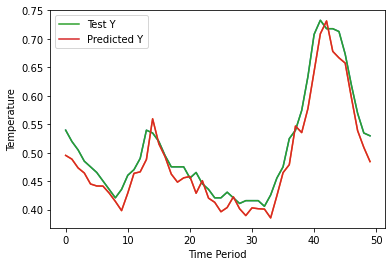

In [19]:
_draw(YT_Test,prediitY)

In [20]:
MinMaxReturn(YT_Test[0],minValue,maxValue)

기온(°C)    23.800000
습도(%)     66.153465
dtype: float64

In [21]:
model.save('lstm_epoch300.h5')

In [22]:
from tensorflow import keras

In [23]:
load=keras.models.load_model('lstm_epoch300.h5')

In [24]:
load.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 4, 2)              16        
_________________________________________________________________
lstm (LSTM)                  (None, 4, 32)             4480      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 32)             8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 21,169
Trainable params: 21,161
Non-trainable params: 8
_________________________________________________________________


In [25]:
XT_Train.shape

(662, 4, 2)